In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from torch import tensor
from torchmetrics.detection import MeanAveragePrecision
from torchvision.ops import box_iou

In [2]:
def calculate_map(predictions, targets, iou_threshold=0.5):
    APs = []
    for prediction, target in zip(predictions, targets):
        pred_boxes = prediction['boxes']
        target_boxes = target['boxes']

        if len(pred_boxes) == 0 or len(target_boxes) == 0:
            APs.append(0)
            continue

        iou_matrix = box_iou(pred_boxes, target_boxes)
        ious = iou_matrix.max(dim=1)[0]  # max IoU for each prediction
        true_positive = (ious >= iou_threshold).sum().item()
        
        # Precision: TP / (TP + FP), FP = len(pred_boxes) - TP
        if len(pred_boxes) > 0:
            precision = true_positive / len(pred_boxes)
        else:
            precision = 0
        
        APs.append(precision)
    
    return sum(APs) / len(APs) if APs else 0.0

In [3]:
targets = {
    "image_1": [
        [50, 50, 150, 150],  # Bounding box 1
        [30, 30, 100, 100]   # Bounding box 2
    ],
    # "image_2": [
    #     [200, 200, 300, 300]  # Bounding box 1
    # ]
}


In [4]:
predictions = {
    "image_1": [
        ([55, 55, 155, 155], 0.9),  # Bounding box 1 with confidence 0.9
        ([28, 28, 98, 98], 0.8),    # Bounding box 2 with confidence 0.8
        ([10, 10, 50, 50], 0.6)     # False positive (extra prediction)
    ],
    # "image_2": [
    #     ([198, 198, 302, 302], 0.85) # Bounding box 1 with confidence 0.85
    # ]
}


In [5]:


# Sample Image Size (if using a blank image)
image_width = 400
image_height = 400



# Function to plot bounding boxes
def plot_bounding_boxes(image_name):
    fig, ax = plt.subplots(1)
    ax.set_xlim(0, image_width)
    ax.set_ylim(0, image_height)
    ax.invert_yaxis()  # To make the y-axis start from the top-left corner

    # Ground truth boxes in red
    for box in targets[image_name]:
        rect = patches.Rectangle(
            (box[0], box[1]),  # Bottom left corner
            box[2] - box[0],   # Width
            box[3] - box[1],   # Height
            linewidth=2, edgecolor='r', facecolor='none', label='Ground Truth'
        )
        ax.add_patch(rect)

    # Predicted boxes in green
    for box, confidence in predictions[image_name]:
        rect = patches.Rectangle(
            (box[0], box[1]),  # Bottom left corner
            box[2] - box[0],   # Width
            box[3] - box[1],   # Height
            linewidth=2, edgecolor='g', facecolor='none', linestyle='--',
            label=f'Predicted (Conf: {confidence:.2f})'
        )
        ax.add_patch(rect)

    # Show the plot
    ax.legend(handles=[patches.Patch(color='red', label='Ground Truth'), patches.Patch(color='green', label='Predicted')])
    plt.title(f"Bounding Boxes for {image_name}")
    plt.show()

# Plot bounding boxes for "image_1"



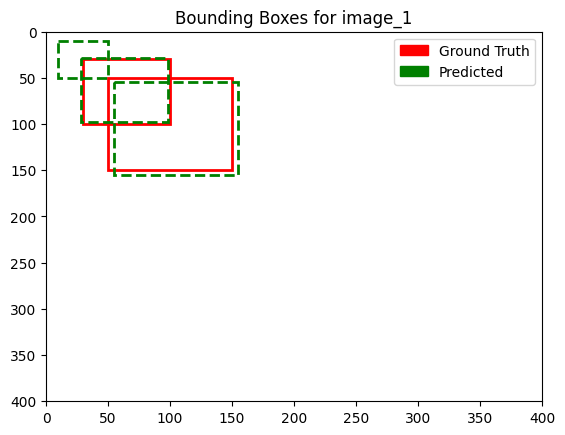

In [6]:
plot_bounding_boxes('image_1')

In [8]:
metric = MeanAveragePrecision(iou_type="bbox")
metric.update(predictions, targets)

ValueError: Expected argument `preds` to be of type Sequence, but got {'image_1': [([55, 55, 155, 155], 0.9), ([28, 28, 98, 98], 0.8), ([10, 10, 50, 50], 0.6)], 'image_2': [([198, 198, 302, 302], 0.85)]}

NameError: name 'preds' is not defined

In [16]:
metric.compute()

/home/michael/miniconda3/envs/openmmlab/lib/python3.8/site-packages/torchmetrics/utilities/prints.py:43: UserWarning: The ``compute`` method of metric MeanAveragePrecision was called before the ``update`` method which may lead to errors, as metric states have not yet been updated.
  warnings.warn(*args, **kwargs)  # noqa: B028


{'map': tensor(-1.),
 'map_50': tensor(-1.),
 'map_75': tensor(-1.),
 'map_small': tensor(-1.),
 'map_medium': tensor(-1.),
 'map_large': tensor(-1.),
 'mar_1': tensor(-1.),
 'mar_10': tensor(-1.),
 'mar_100': tensor(-1.),
 'mar_small': tensor(-1.),
 'mar_medium': tensor(-1.),
 'mar_large': tensor(-1.),
 'map_per_class': tensor(-1.),
 'mar_100_per_class': tensor(-1.),
 'classes': tensor([], dtype=torch.int32)}

In [5]:
metric = MeanAveragePrecision(iou_type="bbox")

In [6]:
metric.update(preds, target)


In [9]:
from pprint import pprint

In [23]:
x = metric.compute()['map_50']

In [24]:
x

tensor(0.6000)

In [25]:
x  +.1


tensor(0.7000)

In [29]:
x

tensor(0.6000)

In [26]:
a = 0


In [27]:
a+=x

In [28]:
a


tensor(0.6000)

In [31]:
type(a)

torch.Tensor